# Project

*Project Scenario*: You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

1. Is there a significant difference in the median value of houses bounded by the Charles river or not?

2. Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?`

#### Import the required libraries we need for the lab.


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


### Boston Housing Dataset Feature Descriptions

- **CRIM**: Per capita crime rate by town
- **ZN**: Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: Proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX**: Nitric oxide concentration (parts per 10 million)
- **RM**: Average number of rooms per dwelling
- **AGE**: Proportion of owner-occupied units built prior to 1940
- **DIS**: Weighted distances to five Boston employment centers
- **RAD**: Index of accessibility to radial highways
- **TAX**: Full-value property-tax rate per $10,000
- **PTRATIO**: Pupil-teacher ratio by town
- **LSTAT**: Percentage of the lower-status population
- **MEDV**: Median value of owner-occupied homes in $1000s


In [9]:
# data descriptions
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,252.500000,146.213884,0.00000,126.250000,252.50000,378.750000,505.0000
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


### Data Visualization 


### Boxplot for Median Value of Wner_occupied Home

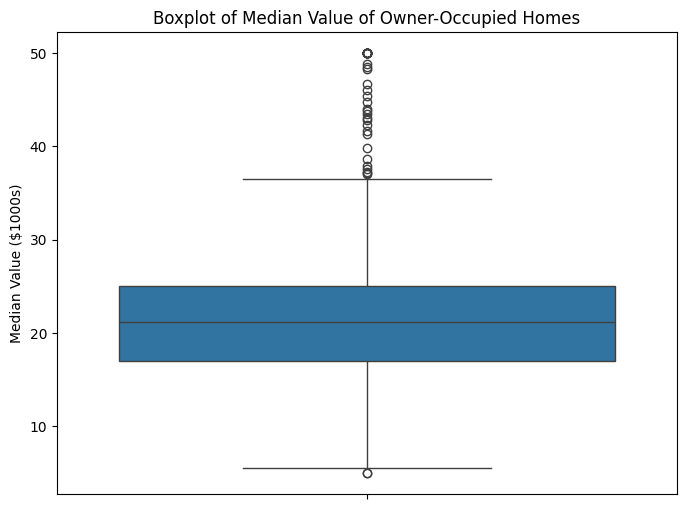

In [7]:
# Plot 1: Boxplot for Median Value of Owner-Occupied Homes (MEDV)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000s)')
plt.show()

**Overall Distribution:** The median value is around $23,000 (assuming the y-axis is scaled in thousands). The data appears skewed to the right, indicating that there are more houses with lower median values and a few outliers with significantly higher values. 
* **Quartile Information:** The box represents the middle 50% of the data, with the first quartile (Q1) at approximately $20,000 and the third quartile (Q3) around $26,000. 
* **Outliers:** There are several data points extending beyond the whiskers, signifying outliers with values significantly higher than the rest of the distribution.


### BarPlot fro Charles River Variable

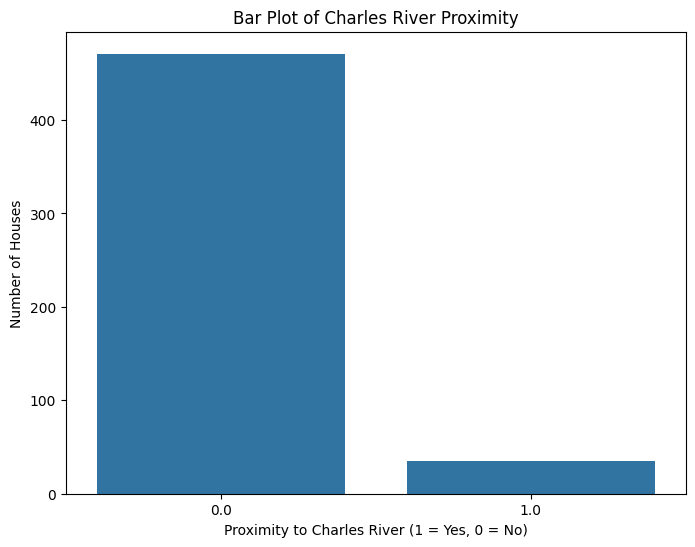

In [10]:
# Plot 2: Bar Plot for Charles River Variable (CHAS)
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', data=df)
plt.title('Bar Plot of Charles River Proximity')
plt.xlabel('Proximity to Charles River (1 = Yes, 0 = No)')
plt.ylabel('Number of Houses')
plt.show()

1. Majority of houses are not near the Charles River

The taller bar represents the number of houses that are not near the Charles River (Proximity = 0). This suggests that most houses in the dataset are located away from the river.

2. Relatively fewer houses are near the Charles River

The shorter bar represents the number of houses that are near the Charles River (Proximity = 1). This indicates that a smaller proportion of houses in the dataset are located close to the river.

Overall, the bar plot highlights that the majority of houses in the dataset are not situated near the Charles River.

### Boxplot of MEDV vs AGE

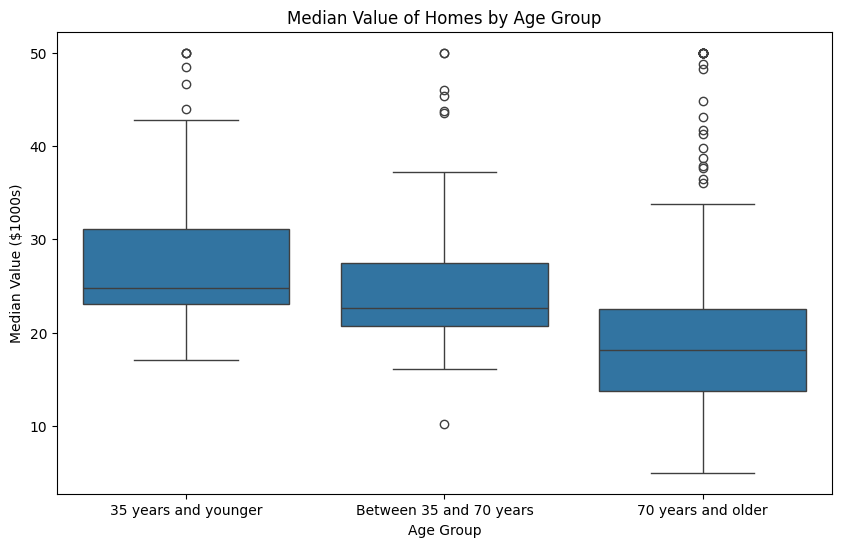

In [12]:
# Plot 3: Boxplot of MEDV vs AGE (Discretized)
# Discretize AGE into three groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=df)
plt.title('Median Value of Homes by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000s)')
plt.show()


1. Median Value:

The median home value for the "35 years and younger" group is around $30,000.
The median value for the "Between 35 and 70 years" group is also around $30,000.
The median value for the "70 years and older" group is around $20,000.

2. Distribution and Spread:

The boxplots show that the distribution of home values is right-skewed for all three groups, with a few outliers on the higher end.
The spread of home values seems to be similar across the three age groups, with the interquartile ranges (IQRs) being roughly equal.

3. Potential Interpretations:

The similar median values for the first two groups suggest that age might not be a significant factor in determining median home values for people under 70.
The lower median value for the "70 years and older" group could be due to various factors, such as retirement, downsizing, or different housing preferences among older individuals.

### Scatter Plot for NOX (Nitric Oxide Concentration) vs INDUS (Not Retail Business Proportion)

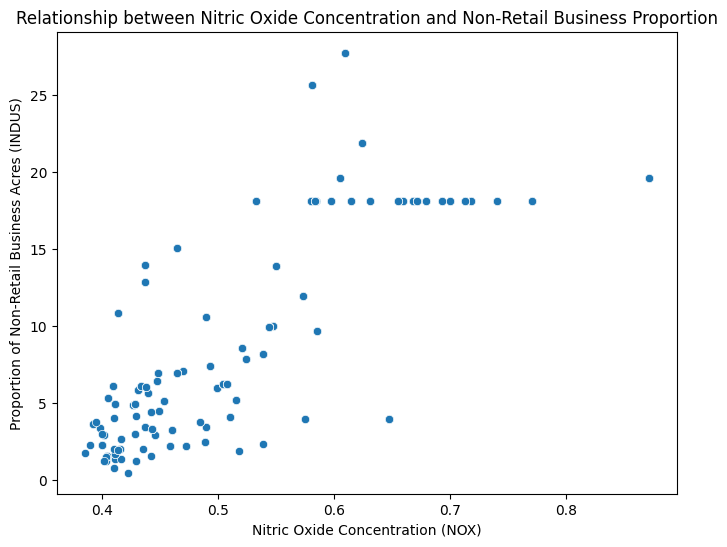

In [13]:
# Plot 4: Scatter Plot for NOX vs INDUS
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NOX', y='INDUS', data=df)
plt.title('Relationship between Nitric Oxide Concentration and Non-Retail Business Proportion')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()


1. Positive Correlation:

There appears to be a positive correlation between NOX and INDUS. This means that as the proportion of non-retail business acres increases, the concentration of Nitric Oxide also tends to increase.

2. Cluster Patterns:

The data points seem to form clusters. There are clusters of data points with lower NOX and INDUS values, and other clusters with higher values.

3. Outliers:

There are a few outliers in the data. These are data points that deviate significantly from the general trend.
Overall, the scatter plot suggests that there is a positive association between Nitric Oxide concentration and the proportion of non-retail business acres. However, the relationship is not perfectly linear and there are some outliers.

Additional Considerations:

It would be helpful to calculate the correlation coefficient to quantify the strength of the relationship.
Further analysis, such as linear regression, could help model the relationship and make predictions.
Remember, correlation does not imply causation. Further research is needed to understand the underlying causes of this relationship.

### Histogram for Pupil-Teacher Ratio

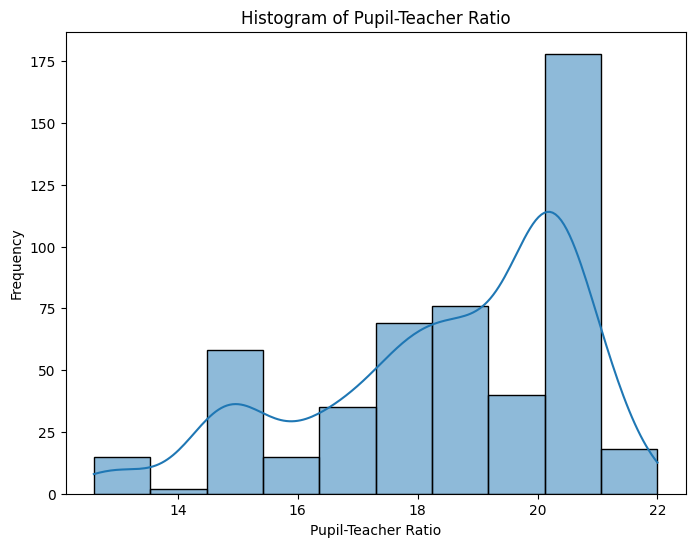

In [14]:
# Plot 5: Histogram for Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8, 6))
sns.histplot(df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


1. Range and Shape:

The pupil-teacher ratios range from approximately 13 to 22.
The distribution is right-skewed, meaning there are more schools with lower pupil-teacher ratios compared to higher ones.

2. Central Tendency:

The peak of the distribution appears to be around 17-18, suggesting that many schools have pupil-teacher ratios in this range.

3. Variability:

There is some variability in the pupil-teacher ratios, with a spread across the range of 13 to 22.
Overall, the histogram indicates that most schools have pupil-teacher ratios between 14 and 20, with a slight skew towards lower ratios.

Additional Considerations:

It would be helpful to know the total number of schools represented in the histogram to get a sense of the sample size.
Comparing this distribution to other districts or countries could provide additional insights into the relative performance of this school district.

# Question 1: Is there a significant difference in median value of houses bounded by the Charles River?

Hypotheses:

Null Hypothesis (H₀): There is no difference in the median value of houses bounded by the Charles River.

Alternative Hypothesis (H₁): There is a significant difference in the median value of houses bounded by the Charles River.

Test: T-test for independent samples (two-sample t-test), with significance level α = 0.05.

Conclusion: If the p-value is less than 0.05, we conclude there is a significant difference in house values based on proximity to the Charles River. Otherwise, we conclude there is no significant difference.

In [15]:
from scipy.stats import ttest_ind

# Separate the data into two groups: near the river (CHAS=1) and not near the river (CHAS=0)
river_houses = df[df['CHAS'] == 1]['MEDV'] # Select houses near the river
non_river_houses = df[df['CHAS'] == 0]['MEDV'] # Select houses not near the river

# Perform the t-test
t_stat, p_value = ttest_ind(river_houses, non_river_houses)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median house values based on proximity to the Charles River.")
else:
    print("Fail to reject the null hypothesis. No significant difference in median house values based on proximity to the Charles River.")


T-statistic: 3.996437466090509, P-value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference in median house values based on proximity to the Charles River.


# Question 2: Is there a difference in median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)?

Hypotheses:

Null Hypothesis (H₀): There is no difference in median values of houses across different age groups.

Alternative Hypothesis (H₁): There is a significant difference in median values of houses across different age groups.

Test: ANOVA, with significance level α = 0.05.

In [17]:
from scipy.stats import f_oneway

# Discretize AGE into three groups and get median values
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 35, 70, 100], labels=['less than 35', 'between 35-70', 'more than 70'])

# Group data and perform ANOVA
group1 = df[df['AGE_GROUP'] == 'less than 35']['MEDV']
group2 = df[df['AGE_GROUP'] == 'between 35-70']['MEDV']
group3 = df[df['AGE_GROUP'] == 'more than 70']['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference in median house values across age groups.")
else:
    print("Fail to reject the null hypothesis. No significant difference in median house values across age groups.")


F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis. There is a significant difference in median house values across age groups.


# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

Hypotheses:

Null Hypothesis (H₀): There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

Alternative Hypothesis (H₁): There is a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

Test: Pearson Correlation, with significance level α = 0.05.

In [18]:
from scipy.stats import pearsonr

# Calculate Pearson correlation
correlation, p_value = pearsonr(df['NOX'], df['INDUS'])

print(f"Pearson Correlation Coefficient: {correlation}, P-value: {p_value}")

# Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis. No significant relationship between NOX and INDUS.")


Pearson Correlation Coefficient: 0.763651446920915, P-value: 7.913361061241532e-98
Reject the null hypothesis. There is a significant relationship between NOX and INDUS.


# Question 4: What is the impact of an additional weighted distance to the five Boston employment centers on the median value of owner-occupied homes?


Hypotheses:

Null Hypothesis (H₀): The distance to employment centers (DIS) has no impact on the median house value (MEDV).

Alternative Hypothesis (H₁): The distance to employment centers (DIS) has an impact on the median house value (MEDV).

Test: Linear regression analysis, with significance level α = 0.05.

In [19]:
import statsmodels.api as sm

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = sm.add_constant(df['DIS'])  # Adds a constant term to the predictor
y = df['MEDV']

# Perform linear regression
model = sm.OLS(y, X).fit()

# Output the regression summary
print(model.summary())

# Conclusion
if model.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis. The distance to employment centers (DIS) has a significant impact on median house value (MEDV).")
else:
    print("Fail to reject the null hypothesis. The distance to employment centers (DIS) has no significant impact on median house value (MEDV).")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 27 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        09:22:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0